##Start of EDA 1##

# Task 1: First pass - load data set and initial clean

##Start of Answer 1##

### Importing all necessary modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

df = pd.read_csv("tips.csv")







### Change sex, smoker, day and time from object value types to categorical and check that changes have been applied

In [ ]:
df.sex = pd.Categorical(df.sex)
df.smoker = pd.Categorical(df.smoker)
df.day = pd.Categorical(df.day, categories=['Thur', 'Fri','Sat', 'Sun'], ordered=True)
df.time = pd.Categorical(df.time, categories=['Lunch', 'Dinner'], ordered=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Add bill_before_tip, bill_pp and tip% columns so more analysis can be performed and drop total_bill as it will no longer be needed

In [ ]:
df = df.assign(
    bill_before_tip = lambda x: x.total_bill - x.tip,
    tip_pct = lambda x: x.tip / x.bill_before_tip * 100,
    bill_pp = lambda x: x.bill_before_tip / x['size'],
    tip_pp = lambda x: x.tip / x['size'],
)

df=df.drop(columns = "total_bill")

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tip              244 non-null    float64 
 1   sex              244 non-null    category
 2   smoker           244 non-null    category
 3   day              244 non-null    category
 4   time             244 non-null    category
 5   size             244 non-null    int64   
 6   bill_before_tip  244 non-null    float64 
 7   tip_pct          244 non-null    float64 
 8   bill_pp          244 non-null    float64 
 9   tip_pp           244 non-null    float64 
dtypes: category(4), float64(5), int64(1)
memory usage: 13.1 KB


None

### Check that the data look alright

In [ ]:
display(df.head(10))

,tip,sex,smoker,day,time,size,bill_before_tip,tip_pct,bill_pp,tip_pp
0,1.01,Female,No,Sun,Dinner,2,15.98,6.320401,7.990000,0.505000
1,1.66,Male,No,Sun,Dinner,3,8.68,19.124424,2.893333,0.553333
2,3.50,Male,No,Sun,Dinner,3,17.51,19.988578,5.836667,1.166667
3,3.31,Male,No,Sun,Dinner,2,20.37,16.249386,10.185000,1.655000
4,3.61,Female,No,Sun,Dinner,4,20.98,17.206864,5.245000,0.902500
5,4.71,Male,No,Sun,Dinner,4,20.58,22.886297,5.145000,1.177500
6,2.00,Male,No,Sun,Dinner,2,6.77,29.542097,3.385000,1.000000
7,3.12,Male,No,Sun,Dinner,4,23.76,13.131313,5.940000,0.780000
8,1.96,Male,No,Sun,Dinner,2,13.08,14.984709,6.540000,0.980000
9,3.23,Male,No,Sun,Dinner,2,11.55,27.965368,5.775000,1.615000


Check if there are any NA values 

In [ ]:
df.isnull().sum()

tip                0
sex                0
smoker             0
day                0
time               0
size               0
bill_before_tip    0
tip_pct            0
bill_pp            0
tip_pp             0
dtype: int64

No null values found so the cleanup is completed

##Start of Answer 1##

# Task 2: Second pass - individual features and target

##End of Answer 1##

## Identify if any of the categorical features have a correlation with our target tip

### Checking Categorical 

From the plots below we can tell that :
There are more male bill payers (pie chart) and male bill payers tip better - potential correlation
There are more non-smokers (pie chart) however both tip similarly
The days are the busiest in the following order Saturday > Sunday > Thursday > Friday, best tips are achieved on a Saturday and the worst on a Friday -potential correlation
There are more customers at dinner time and the tips seem to be higher during dinner - potential correlation


<AxesSubplot:ylabel='smoker'>

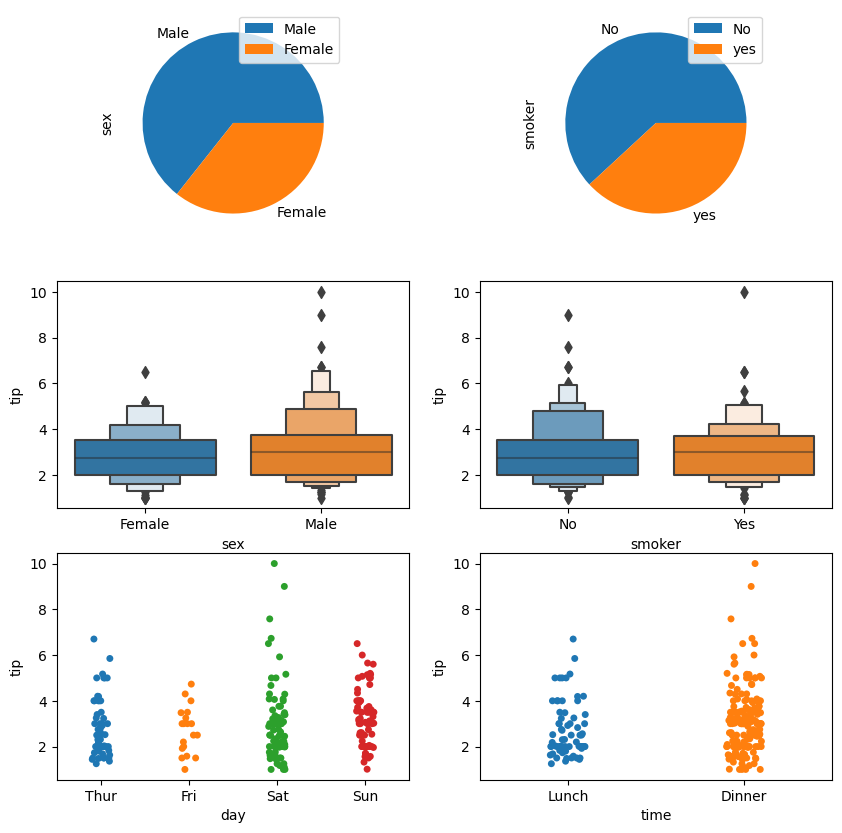

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.boxenplot(ax=axes[1,0], x=df.sex , y=df.tip )
sns.boxenplot(ax=axes[1,1], x=df.smoker , y=df.tip )
sns.stripplot(ax=axes[2,0], x=df.day , y=df.tip )
sns.stripplot(ax=axes[2,1], x=df.time , y=df.tip )

df2 = pd.DataFrame({'sex': [df.sex[df.sex=="Male"].count() , df.sex[df.sex=="Female"].count() ]},index=['Male', 'Female'])
df3 = pd.DataFrame({'smoker': [df.smoker[df.smoker=="No"].count(), df.smoker[df.smoker=="Yes"].count()]}, index=['No', 'yes'])
                    
df2.plot.pie(y='sex', ax=axes[0,0])
df3.plot.pie(y='smoker', ax=axes[0,1])

### Check Numerical and remove one tip outlier to get a better idea of the tip distribution 

Here are some possible correlations that we can see from the  pair plot :
The tip amount increase as the group size increases  - min and max tip values on pair plot increase each time the group size increases
Smaller group sizes tend to have a higher median tip percentage  - standard deviation and data distribution on the pair plot increases as the gruop gets smaller
The tip percentage is higher when the bill is lower -  you can see that data is clustered on the left side of the plot and as the bill decreases date distribution moves out further right 
Bills are higher for bigger groups - min,  max and median values increase as the group

,tip,sex,smoker,day,time,size,bill_before_tip,tip_pct,bill_pp,tip_pp
178,4.00,Female,Yes,Sun,Dinner,2,5.60,71.428571,2.800000,2.000000
67,1.00,Female,Yes,Sat,Dinner,1,2.07,48.309179,2.070000,1.000000
232,3.39,Male,No,Sat,Dinner,2,8.22,41.240876,4.110000,1.695000
183,6.50,Male,Yes,Sun,Dinner,4,16.67,38.992202,4.167500,1.625000
109,4.00,Female,Yes,Sat,Dinner,2,10.31,38.797284,5.155000,2.000000
...,...,...,...,...,...,...,...,...,...,...
187,2.00,Male,Yes,Sun,Dinner,5,28.46,7.027407,5.692000,0.400000
0,1.01,Female,No,Sun,Dinner,2,15.98,6.320401,7.990000,0.505000
57,1.50,Female,No,Sat,Dinner,2,24.91,6.021678,12.455000,0.750000
102,2.50,Female,Yes,Sat,Dinner,3,41.80,5.980861,13.933333,0.833333


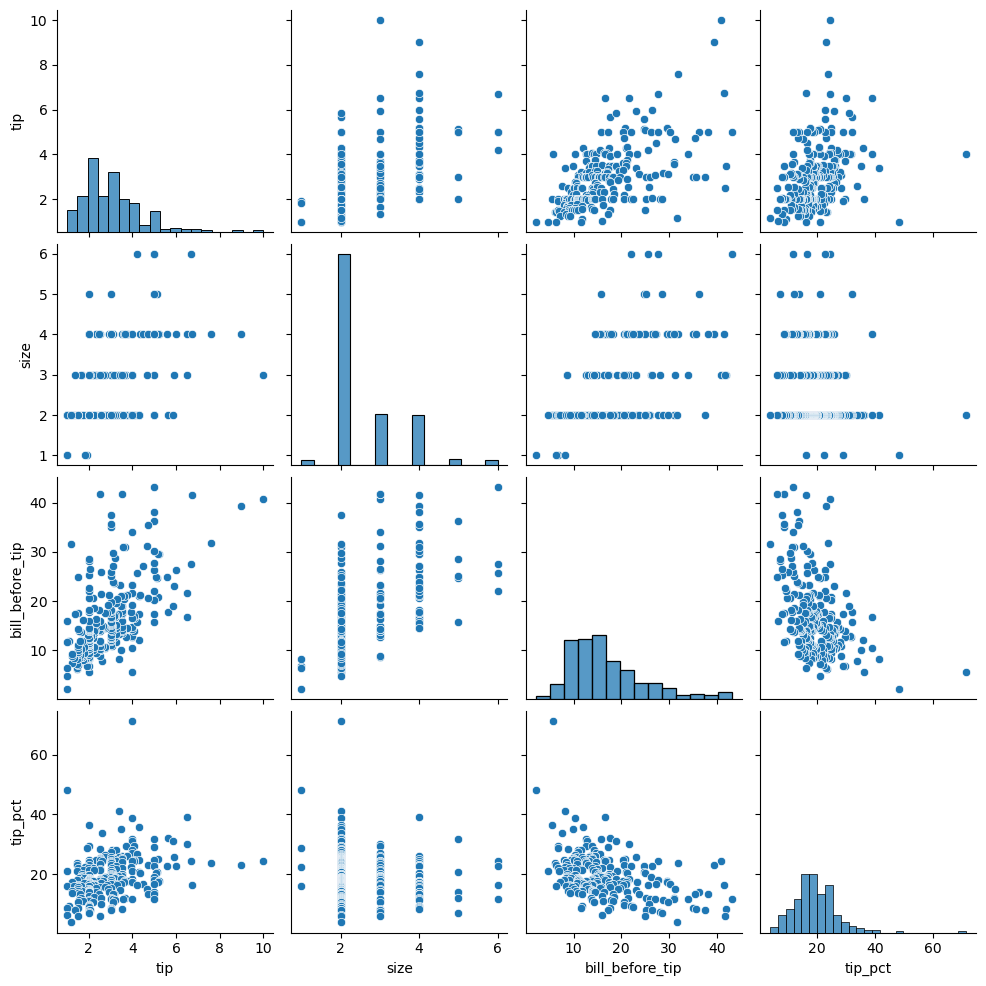

In [25]:
tips_no_outlier  = df.sort_values(["tip_pct"] , ascending=False )
tips_no_outlier.drop(index=tips_no_outlier.index[0], axis=0, inplace=True)
display(tips_no_outlier)

sns.pairplot(tips_no_outlier , vars=["tip" , "size" , "bill_before_tip", "tip_pct"])

##End of Answer 2##

# Task 3: Third pass - relationships between features and target

##Start of Answer 3##

### Using Spearman’s and Pearson’s Correlation Rank Coefficients to further identify possible correlations

From the heatmap of the Spearman's coefficient we can see the following have the most notable  relations 
tip - tip_pp - excluded as tip pp obviously depends on the tip
tip - bill_before_tip - 0.59
size - bill_before_tip - 0.59
tip_pct - bill_before_tip - 0.43
bill_pp - tip_pct - excluded as this is similar to bill_before_tip and tip_pct

The two most suprising correlations here are the tip and bill and tip percentage and bill, we will look into this further

From  Pearsons correlation heatmap we can see  that the following have a high level of correlation once again 
tip - bill_before_tip - 0.58 (overlaps with with weaker relation tip_pct - bill_before_tip - 0.3)
size - bill_before_tip - 0.58
 

What is interesting here is that Pearson's heatmap shows a higher correlation between tip_pct - bill_pp than tip_pct-bill_before_tip whereas Spearmans heatmap shows the opposite

,tip,size,bill_before_tip,tip_pct,bill_pp,tip_pp
tip,1.000000,0.468268,0.593692,0.396186,0.318711,0.695654
size,0.468268,1.000000,0.594742,-0.152211,-0.144918,-0.262061
bill_before_tip,0.593692,0.594742,1.000000,-0.427085,0.670002,0.185585
tip_pct,0.396186,-0.152211,-0.427085,1.000000,-0.380125,0.548320
bill_pp,0.318711,-0.144918,0.670002,-0.380125,1.000000,0.490681
tip_pp,0.695654,-0.262061,0.185585,0.548320,0.490681,1.000000


,tip,size,bill_before_tip,tip_pct,bill_pp,tip_pp
tip,1.000000,0.489299,0.576663,0.241572,0.253268,0.677494
size,0.489299,1.000000,0.578831,-0.102808,-0.144104,-0.253618
bill_before_tip,0.576663,0.578831,1.000000,-0.302144,0.687165,0.150386
tip_pct,0.241572,-0.102808,-0.302144,1.000000,-0.312787,0.390978
bill_pp,0.253268,-0.144104,0.687165,-0.312787,1.000000,0.401059
tip_pp,0.677494,-0.253618,0.150386,0.390978,0.401059,1.000000


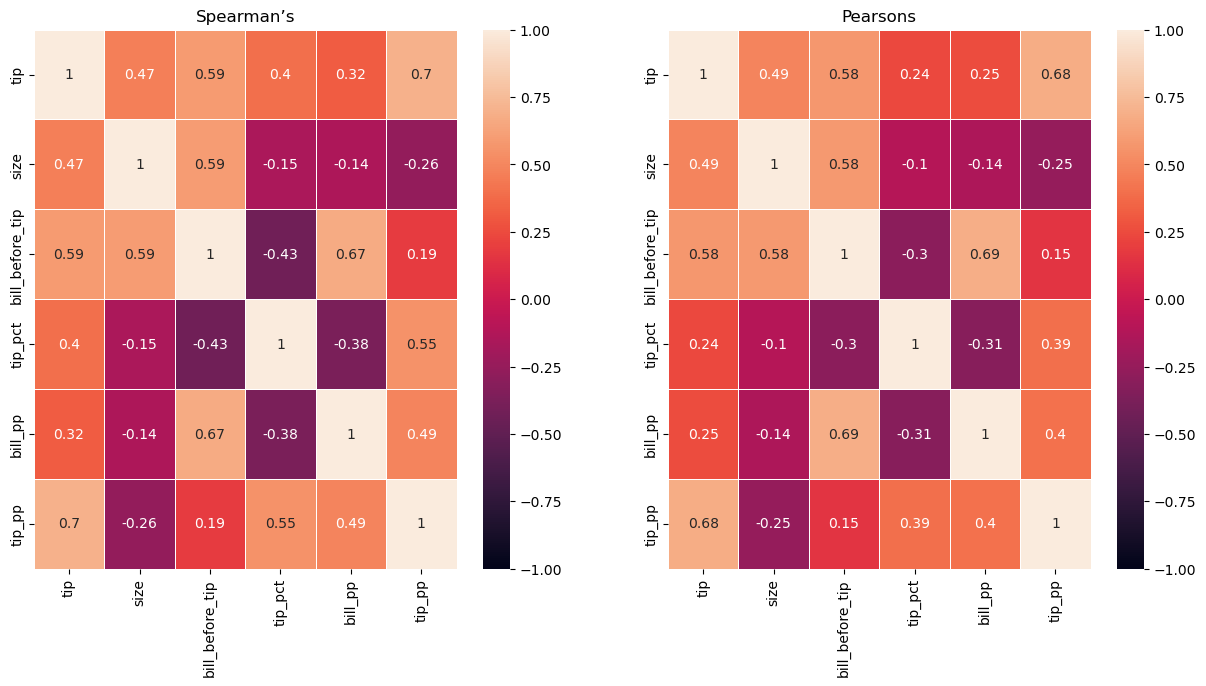

In [26]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 7))

columns = df.columns
SpearCorr = df[columns].corr(method='spearman')

ax1.set_title("Spearman’s")
sns.heatmap( SpearCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5 , ax=ax1)
display(SpearCorr)

PearsonCorr = df[columns].corr()
ax2.set_title("Pearsons")
sns.heatmap(PearsonCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5 , ax=ax2)
display(PearsonCorr)

### Using Phiks correlation coefficient to identify categorical relations

Phiks heatmap doesnt point to any strong relationships between the tip amount and any categorical features
We can see that there is a possible relationship between day - sex and day - smoker, we will look into these a bit more 

interval columns not set, guessing: ['tip', 'size', 'bill_before_tip', 'tip_pct', 'bill_pp', 'tip_pp']


,tip,sex,smoker,day,time,size,bill_before_tip,tip_pct,bill_pp,tip_pp
tip,1.000000,0.000000,0.000000,0.000000,0.053678,0.430985,0.742296,0.273954,0.363611,0.941350
sex,0.000000,1.000000,0.000000,0.309001,0.286979,0.082603,0.104836,0.000000,0.000000,0.000000
smoker,0.000000,0.000000,1.000000,0.455862,0.000000,0.073305,0.170766,0.115066,0.349089,0.047328
day,0.000000,0.309001,0.455862,1.000000,0.995930,0.219379,0.000000,0.128833,0.000000,0.000000
time,0.053678,0.286979,0.000000,0.995930,1.000000,0.294770,0.242387,0.000000,0.000000,0.142475
size,0.430985,0.082603,0.073305,0.219379,0.294770,1.000000,0.479183,0.000000,0.000000,0.176881
bill_before_tip,0.742296,0.104836,0.170766,0.000000,0.242387,0.479183,1.000000,0.478113,0.909246,0.459139
tip_pct,0.273954,0.000000,0.115066,0.128833,0.000000,0.000000,0.478113,1.000000,0.524031,0.569141
bill_pp,0.363611,0.000000,0.349089,0.000000,0.000000,0.000000,0.909246,0.524031,1.000000,0.571909
tip_pp,0.941350,0.000000,0.047328,0.000000,0.142475,0.176881,0.459139,0.569141,0.571909,1.000000


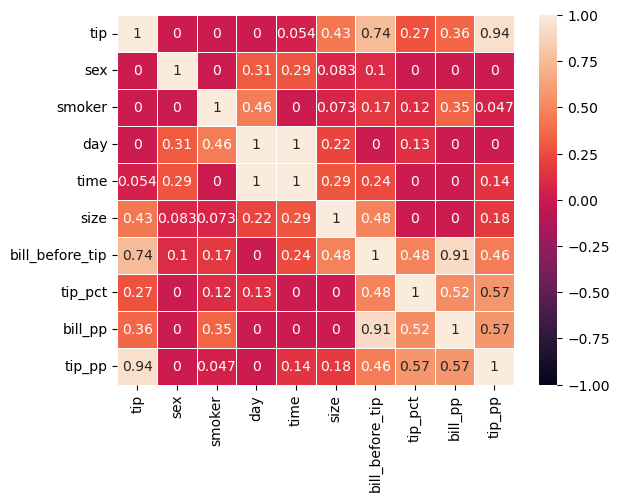

In [27]:
import phik
columns = df.columns
PhikCorr = df[columns].phik_matrix()

sns.heatmap(PhikCorr, annot=True, vmin=-1 , vmax=1,  linewidths=0.5)

PhikCorr

### tip & tip_pct - bill_before_tip 

From the first lmplot, we can see that although it is a weak negative relation (almost horizontal regression line) one could come to assume that lower bills tend to come with a better tipping percentage however the 2nd plot shows a stronger positive relation (regression line with a bigger angle to the x-axis) between the tip and total bill as we can be more confident (wider confidence interval) in saying that higher bills come with higher tips

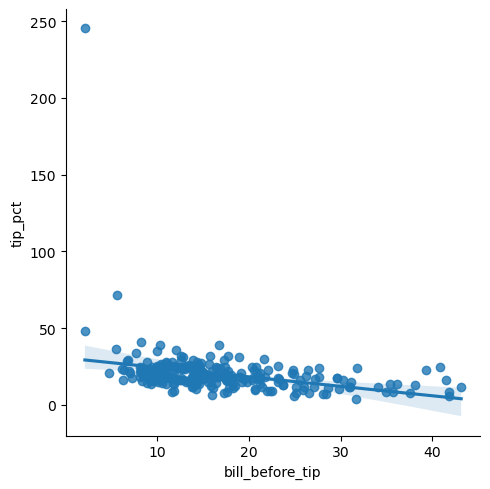

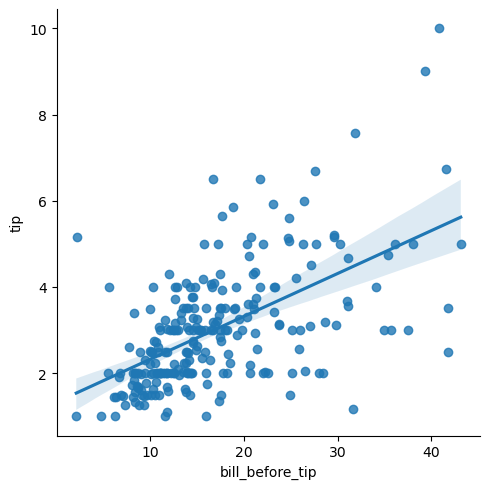

In [28]:
sns.lmplot(x="bill_before_tip", y="tip_pct", data=df);
sns.lmplot(x="bill_before_tip", y="tip", data=df);

### size - bill_before_tip


Using a boxplot we can distinguish the median bill of each group and see that it gradually increases as the groups get bigger,
Looking at the interquartile range of each group we can tell that groups 1,5 and 6 have a small set of data and their bill values seem pretty concise however groups of 2,3,4 have larger sets of data and it's more distributed
The steep line of the lmplot further proves that the bill has a strong positive relationship with the group size and that the bill tends to get higher as the size increases.
Interestingly enough the median tip_pct gradually lowered as the group size increased.

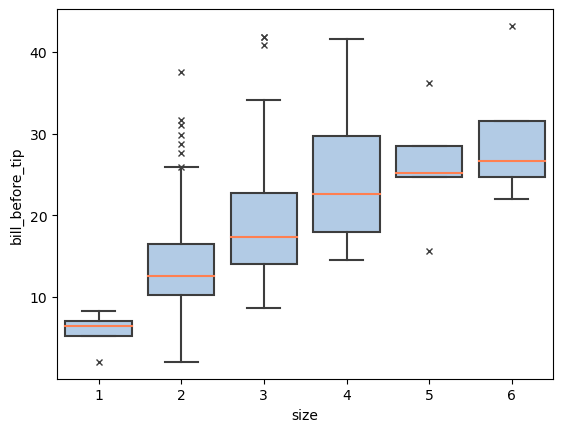

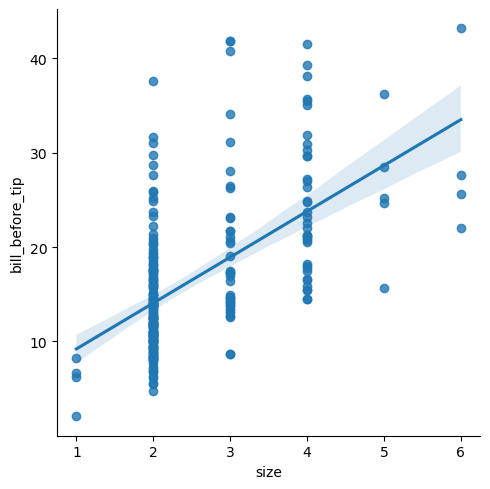

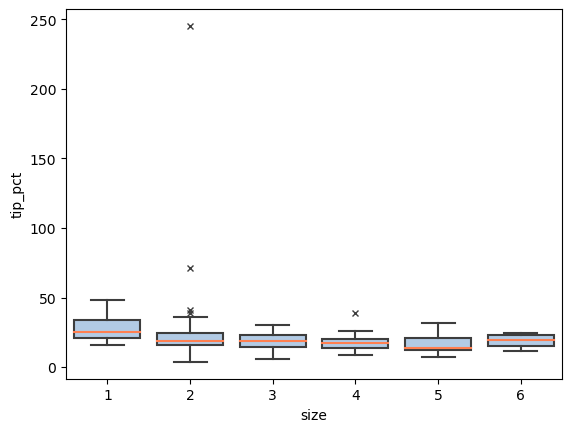

In [29]:
sns.boxplot(data=df, x="size", y="bill_before_tip",flierprops={"marker": "x"},boxprops={"facecolor": (.4, .6, .8, .5)},medianprops={"color": "coral"},)
plt.show()
sns.lmplot(x="size", y="bill_before_tip", data=tips_no_outlier);
plt.show()
sns.boxplot(data=df, x="size", y="tip_pct",flierprops={"marker": "x"},boxprops={"facecolor": (.4, .6, .8, .5)},medianprops={"color": "coral"},)
plt.show()

### day - sex and day - smoker

The count plots below show :
Weekends were the busiest and mainly male dominated while Thursdays and friday was evenly distributed between male and females but Fridays were the quietest days
The ratio of smokers to non-smokers was the most balanced on a Saturday, outweighed the non-smokers on a Friday and was roughly 1/3 of the customers on a Thursday.

<AxesSubplot:xlabel='day', ylabel='count'>

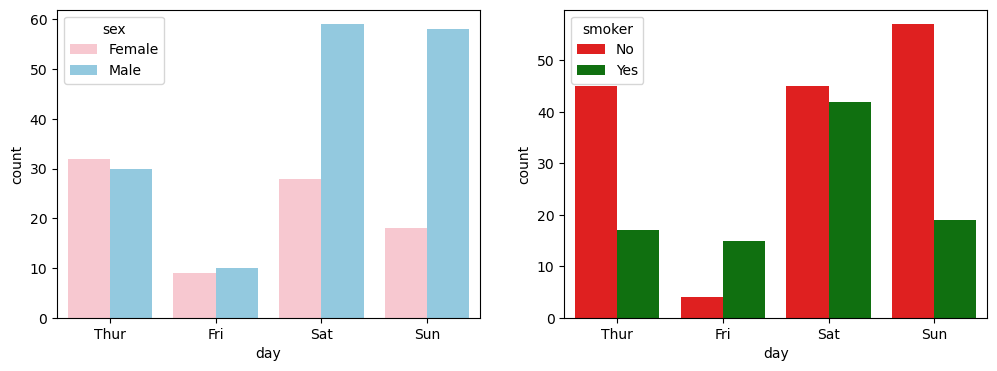

In [30]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x ="day", hue="sex",data =df, ax=axes[0] , palette=['pink',"skyblue"])
sns.countplot(x ="day", hue="smoker",data =df, ax=axes[1] , palette=["red","green"])

## Looking into correlations that didn't show a high correlation coefficient but were identified at an early stage

### tip and dinner time

Looking at the pivot table shows the mean tip was always higher at dinner, it would be interesting to see how the sex and smoker affect the tip and bill overall.
The violin plot shows us that the median and distribution of the tip_pct is lower during lunch which supports our claim to the fact that dinner time had higher tips.

tip       
time          Lunch Dinner
sex    smoker             
Female No      2.46   3.04
       Yes     2.89   2.95
Male   No      2.94   3.16
       Yes     2.79   3.12

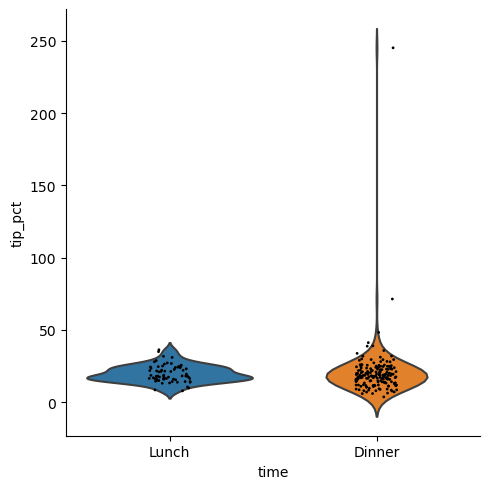

In [18]:
g = sns.catplot(x="time", y="tip_pct",kind="violin" ,inner=None, data=df )
sns.stripplot(x="time", y="tip_pct", data=df , color="black", jitter=True ,size=2,  ax=g.ax);
plt.show

df.pivot_table(values=['tip'], index=['sex','smoker'], columns=['time'], aggfunc=np.mean).round(2)

### sex - total-bill & tip

From the lmplot we can see that the regression line for males and females is very close but a bit steeper for males. Comparing the two regression lines we can say that males give smaller tips on small bills when compared to females however they also give higher tips on higher bills.


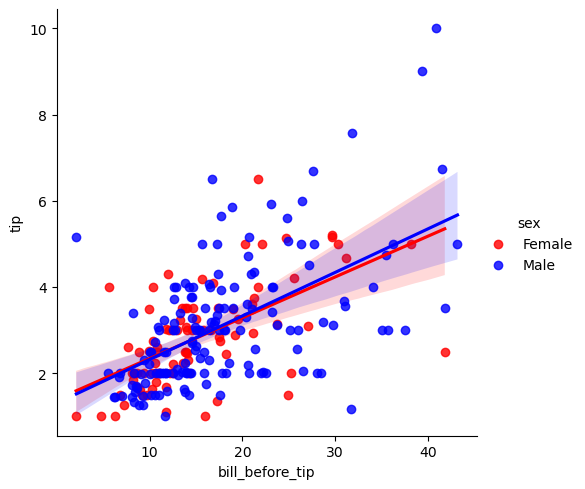

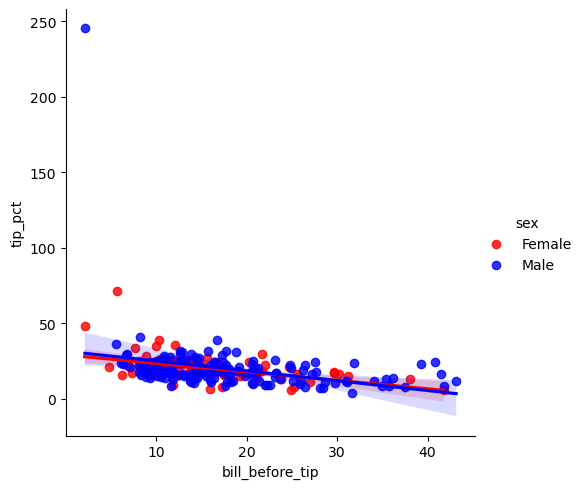

In [32]:
sns.lmplot(x="bill_before_tip", y="tip", hue="sex",data=df, palette=["red","blue"] )
sns.lmplot(x="bill_before_tip", y="tip_pct", hue="sex",data=df, palette=["red","blue"] )

### sex & smoker - tip

From the lmplots we can see that a smoker does affect the tip as the regression line is steeper (strong correlation between x and y ) in the non-smoker plot 
While there is a smoker present the sex of the bill payer doesnt affect the tip, as we see the regression lines are near identical if a smoker is present and the male regression line 
has a stronger relationship when there is no smoker present.
We can also see that male bill_payers spend more than females on average and their spending is more variable as can be seen by the distribution of the male bill on the lmplots below.

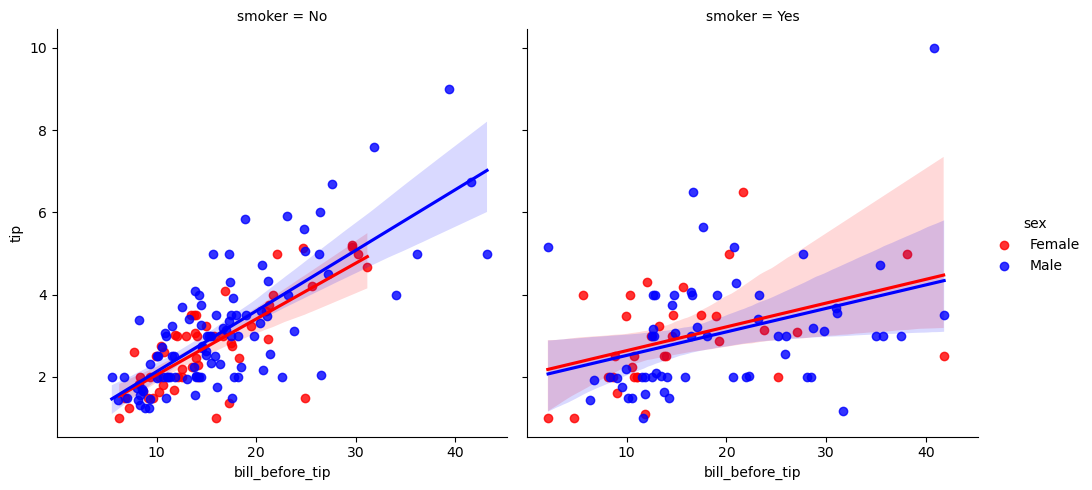

In [23]:
sns.lmplot(x="bill_before_tip", y="tip", hue="sex",col="smoker",data=df, palette=["red" , "blue"])

## bill_before_tip - sex & time by day

From the cat plots, we can tell that dinner is the preferred time throughout most days except Thursday where lunch dominates and theres only one bill at dinner time.
The day affects the ratio of male to female bill payers as weekends are predominantly paid by men.
The time of day could affect the ratio of male to female bill payers as lunch times seems to be more balanced. However, I dont think enough data is gathered to make a confident conclusion.
The highest bills are mostly paid by males on weekends.

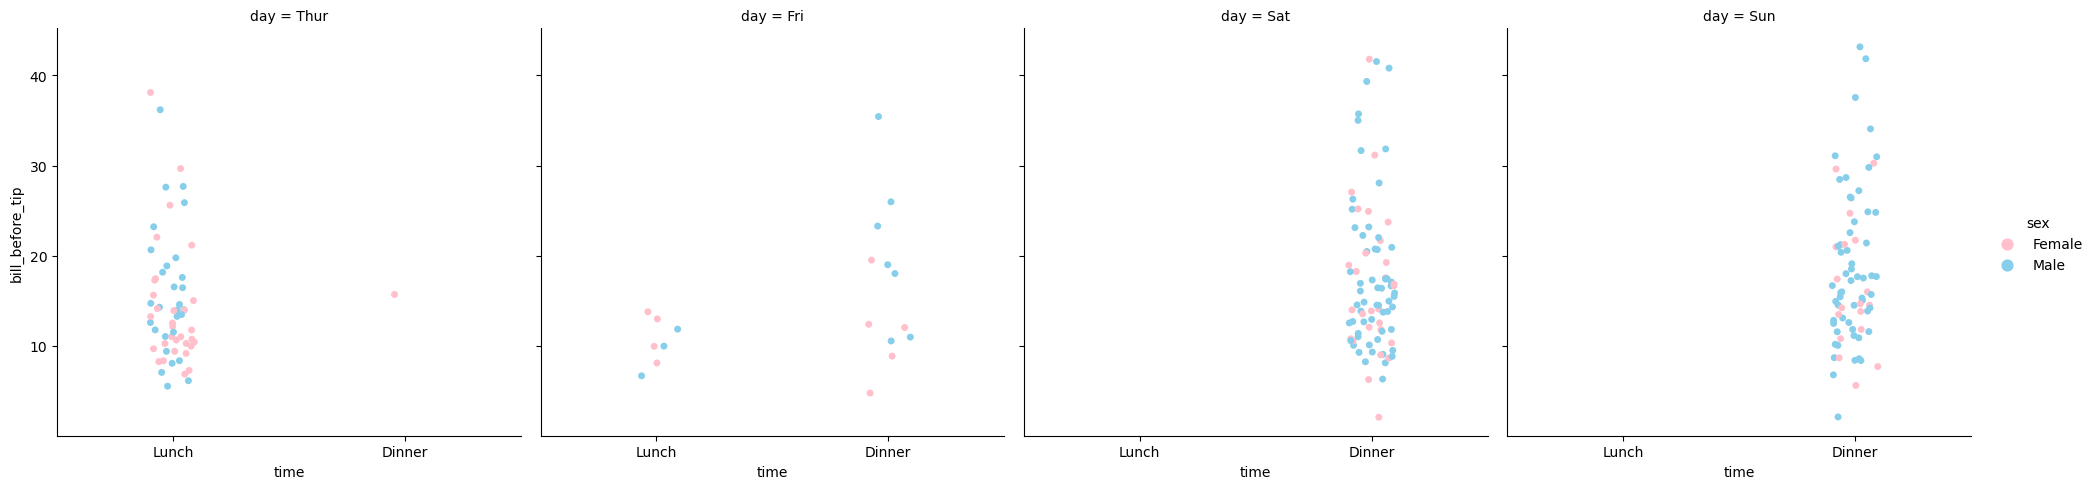

In [26]:
sns.catplot(data=df, x="time", y="bill_before_tip", hue="sex", col="day" , palette=["pink","skyblue"])

##End of Answer 3##

## Conclusions :
 
- Bigger bills were accompanied by higher tips however higher bills also had a lower tip percentage while lower bills boasted a higher tip percentage. This showed that customers would tip more generously with cheaper orders but expensive orders would still carry a bigger tip.

- Bigger groups tend to spend more as the bill increased each time the size of the group incremented however the groups tend to be less generous as they increase as was shown by the median tip_pct decreasing each time the size incremented. 

- It could be seen that a near equal amount of males and females paid the bills on weekdays but during the weekend male billpayers outnumbered female billpayers 3:1 (on average).

- Male spending is generally more variable and higher than that of females.

- Weekends were the busiest days and mainly dominated by male billpayers however Fridays and Thursdays were close to evenly balanced between male and female billpayers. Fridays were also the quietest days by far.

- The ratio of smokers to non-smokers was roughly 1:3 on most days except on a Saturday when it was nearing 1:1 and Friday when it was ~3:1.

- On average dinner time always had higher tips and the median tip percentage was also higher during dinner.

- Females give a higher tip on smaller bills while men tip higher on higher bills.

- Females have a higher tip percentage on higher bills and men have a higher tip percentage on lower bills. This doesnt make much sense until we consider the fact that males pay higher bills on average.

- While there is a smoker present the sex of the bill payer doesnt affect the tip 

- Dinner is the preferred time for most days except Thursday when its nearly all lunch.

- The time of day could potentially affect the ratio of female to male billpayers.

- The highest bills are on Saturdays and Sundays

## Issues with dataSet
- We only know the gender of the bill payer and have no information about the group gender breakdown.
- We only know if the bill payer is a smoker or not and have no information on the amount of smoker in a group.
- Dont know the specific price breakdown per person , some people in a group might have more expensive taste.
- Dont know the specific tip amount per person , some people in a group might be more geneorus than others.


It would be interesting to analyse this data set withot the issues as we could get a more accurate prediction on relations between features and targets

##End of EDA 1##